In [165]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [166]:
data = pd.read_csv('../input/Mall_Customers.csv')

In [167]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [169]:
data.isnull().values.any()

False

In [170]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


So spending score is inversely correlated to age and not so much correlated to income. Sounds interesting. Lets dig in and verify.

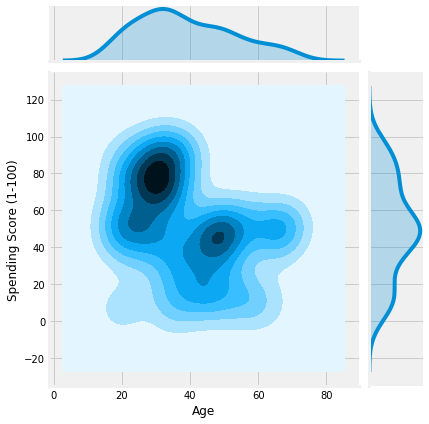

In [171]:
sns.jointplot(x='Age',y='Spending Score (1-100)',data=data,kind='kde')

Shows that age group 20-40 are much higher spenders as compared to older age groups.

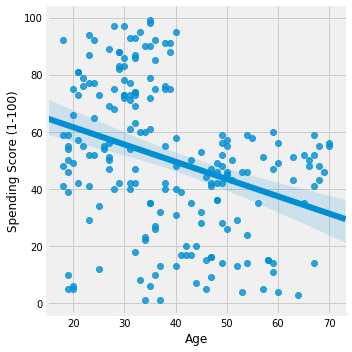

In [172]:
sns.lmplot(x='Age',y='Spending Score (1-100)',data=data)

As age increases, their spending score decreases! We need our marketing strategies to intice the younger groups as they try to spend more. But wait, isn't it so that as one ages, their income increases and so maybe they would be more inclined to buy more stuff!? Lets see that too! First lets check if their is some distinction in spending patterns among genders.

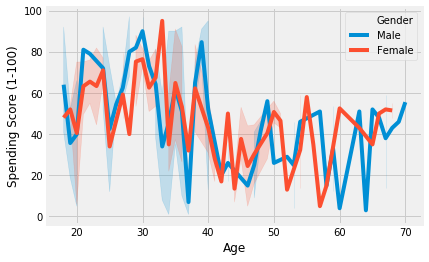

In [173]:
#plt.figure(figsize=(15,6))
sns.lineplot(x='Age',y='Spending Score (1-100)',data=data,hue='Gender')

Hardly any distinction among genders, which should be true as well! (MALES==FEMALES) #Genderequality!

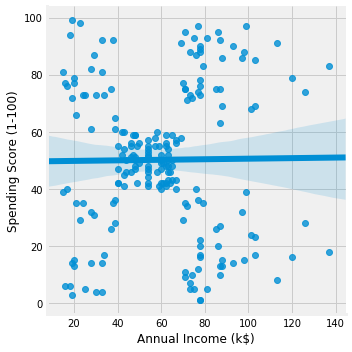

In [174]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)

This is something interesting! Shows that the spending score is much more dependent on the age group and less on the income. A person in his/her 20s and 30s has lesser responsibilities and dependencies and hence is able to spend more! So our marketing strategies should not try to categorise clients based on their income but rather their age group! Lets dig deeper and verify our results using ML!

Lets use KMeans and see if we can cluster customers into groups depending on their spending score & age.

In [175]:
data_new = data.iloc[:, [2, 4]].values

In [176]:
from sklearn.cluster import KMeans 

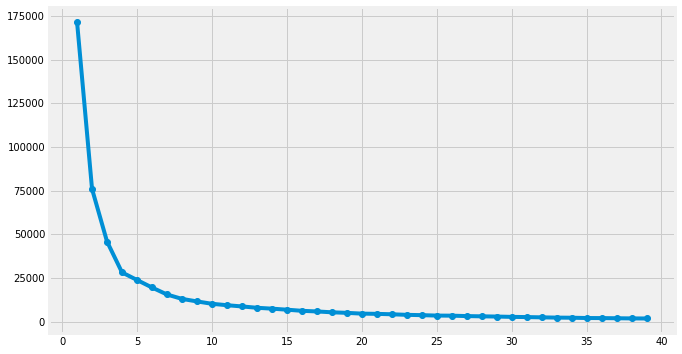

In [177]:
error_rate = []
for i in range(1,40):
    KM = KMeans(n_clusters=i)
    KM.fit(data_new)
    error_rate.append(KM.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o')

In [178]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(data_new)

In [179]:
y_means

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [180]:
(data_new[y_means == 0, 0]).shape

(48,)

In [181]:
plt.scatter(data_new[y_means == 0, 0], data_new[y_means == 0, 1], s = 200, c = 'pink')
plt.scatter(data_new[y_means == 1, 0], data_new[y_means == 1, 1], s = 200, c = 'yellow')
plt.scatter(data_new[y_means == 2, 0], data_new[y_means == 2, 1], s = 200, c = 'cyan')
plt.scatter(data_new[y_means == 3, 0], data_new[y_means == 3, 1], s = 200, c = 'magenta')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')

TypeError: 'tuple' object is not callable

Hence we are able to categorise different age groups wrt their age and spending score.